In [143]:
import matplotlib.pyplot as plt
import numpy as np

# Linear Example

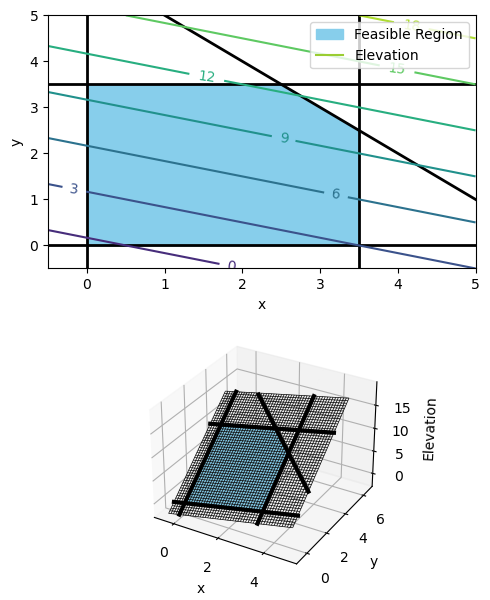

In [160]:
# Define the function
def plot_function(a, b, c, ax, xBounds = [-1,5], yBounds = [-1,5], **kwargs):
    """
    A function to plot the function a*x + b*y = c regardless of the value of a, b, or c

    Parameters
    ----------
    a: float
        The x coefficient
    b: float
        The y coefficient
    c: float
        The constant coefficient
    ax: matplotlib axis
        The axis upon which you'd like to draw this plot.
    xBounds: 2-tuple
        The minimum and maximum x value for the line generated
    yBounds: 2-tuple
        The minimum and maximum y value for the line generated
    **kwargs: dict
        Any other parameters to pass to ax.plot
    """
    if b == 0:
        xVal = c / a
        ax.plot([xVal,xVal],yBounds,**kwargs)
    else:
        slope = -a/b
        intercept = c / b
        ax.plot(xBounds,[slope*xBounds[0]+intercept,slope*xBounds[1]+intercept],**kwargs)

x = np.linspace(-1, 5)
y = np.linspace(-1, 5)
X, Y = np.meshgrid(x, y)
# Define the function
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2,1,2,projection='3d')

# Call the function with a=1, b=2, c=3
plot_function(1,0,0,ax,color="black",linewidth=2)
plot_function(0,1,0,ax,color="black",linewidth=2)
plot_function(0,1,3.5,ax,color="black",linewidth=2)
plot_function(1,0,3.5,ax,color="black",linewidth=2)
plot_function(1,1,6,ax,color="black",linewidth=2)

ax.fill_between([0,2.5,3.5],[0,0,0],[3.5,3.5,2.5],color="skyblue",label="Feasible Region")

x = np.linspace(-0.5, 5)
y = np.linspace(-0.5, 5)
X, Y = np.meshgrid(x, y)

Zfunc = lambda X,Y: X + 3*Y - 0.5

Z = Zfunc(X,Y)
CS = ax.contour(X, Y, Z)
ax.clabel(CS, CS.levels, inline=True, fontsize=10)
ax.plot([-10,],[-10,],color="yellowgreen",label="Elevation")

ax.set_xlim(-0.5,5)
ax.set_ylim(-0.5,5)
ax.grid()
ax.legend(loc=1)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("Elevation")

ax2.plot_wireframe(X,Y,Z,linewidth=0.5,color="black")
ax2.plot(x,np.zeros(len(x)),Zfunc(x,np.zeros(len(x))),color="black",linewidth=3,zorder=10)
ax2.plot(np.zeros(len(y)),y,Zfunc(np.zeros(len(y)),y),color="black",linewidth=3,zorder=10)
ax2.plot(np.ones(len(y))*3.5,y,Zfunc(np.ones(len(y))*3.5,y),color="black",linewidth=3,zorder=10)
ax2.plot(x,np.ones(len(x))*3.5,Zfunc(x,np.ones(len(x))*3.5),color="black",linewidth=3,zorder=10)
z = Zfunc(x,6-y)
z[z>15.5] = np.nan
ax2.plot(x,6-y,z,color="black",linewidth=3,zorder=10)

for xi in range(len(x)):
    if x[xi] < 0 or x[xi] > 3.5:
        Z[xi,:] = np.nan
        continue
    for yi in range(len(y)):
        if y[yi] < 0 or y[yi] > 3.5:
            Z[xi,yi] = np.nan
        if x[xi] + y[yi] > 6:
            Z[xi,yi] = np.nan

ax2.plot_surface(X,Y,Z,linewidth=0.5,color="skyblue")

ax.set_xlim(-0.5,5)
ax.set_ylim(-0.5,5)
ax.grid()
ax.legend(loc=1)
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.tight_layout()
fig.savefig("LinearObjective.png")

# Nonlinear Example

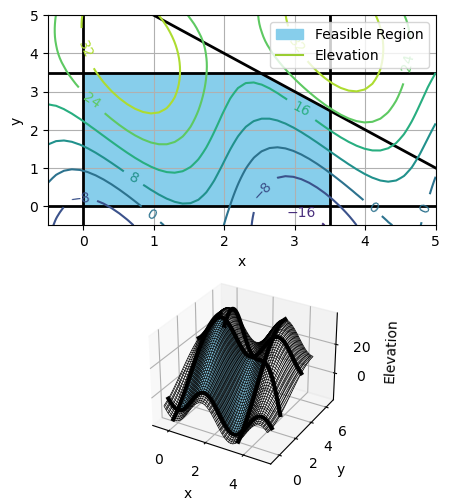

In [162]:
# Define the function
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2,1,2,projection='3d')

# Call the function with a=1, b=2, c=3
plot_function(1,0,0,ax,color="black",linewidth=2)
plot_function(0,1,0,ax,color="black",linewidth=2)
plot_function(0,1,3.5,ax,color="black",linewidth=2)
plot_function(1,0,3.5,ax,color="black",linewidth=2)
plot_function(1,1,6,ax,color="black",linewidth=2)

ax.fill_between([0,2.5,3.5],[0,0,0],[3.5,3.5,2.5],color="skyblue",label="Feasible Region")

x = np.linspace(-0.5, 5)
y = np.linspace(-0.5, 5)
X, Y = np.meshgrid(x, y)

Zfunc = lambda X,Y: 20*np.sin((X+Y/5)*np.pi/3)**2 + 20*np.sin((Y-1-X/5)*np.pi/6)

Z = Zfunc(X,Y)
CS = ax.contour(X, Y, Z)
ax.clabel(CS, CS.levels, inline=True, fontsize=10)
ax.plot([-10,],[-10,],color="yellowgreen",label="Elevation")

ax.set_xlim(-0.5,5)
ax.set_ylim(-0.5,5)
ax.grid()
ax.legend(loc=1)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("Elevation")

ax2.plot_wireframe(X,Y,Z,linewidth=0.5,color="black")
ax2.plot(x,np.zeros(len(x)),Zfunc(x,np.zeros(len(x))),color="black",linewidth=3,zorder=10)
ax2.plot(np.zeros(len(y)),y,Zfunc(np.zeros(len(y)),y),color="black",linewidth=3,zorder=10)
ax2.plot(np.ones(len(y))*3.5,y,Zfunc(np.ones(len(y))*3.5,y),color="black",linewidth=3,zorder=10)
ax2.plot(x,np.ones(len(x))*3.5,Zfunc(x,np.ones(len(x))*3.5),color="black",linewidth=3,zorder=10)
ax2.plot(x,6-y,Zfunc(x,6-x),color="black",linewidth=3,zorder=10)

for xi in range(len(x)):
    if x[xi] < 0 or x[xi] > 3.5:
        Z[xi,:] = np.nan
        continue
    for yi in range(len(y)):
        if y[yi] < 0 or y[yi] > 3.5:
            Z[xi,yi] = np.nan
        if x[xi] + y[yi] > 6:
            Z[xi,yi] = np.nan

ax2.plot_surface(X,Y,Z,linewidth=0.5,color="skyblue")

fig.savefig("NonlinearObjective.png")

# Route Planning Problem

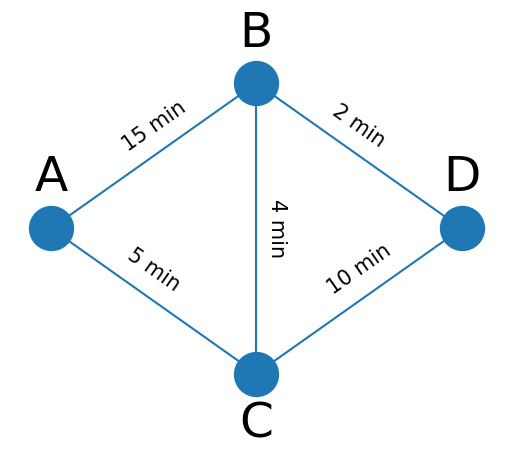

In [218]:
points = np.array([
    [0,0],
    [1,np.sqrt(2)/2],
    [1,-np.sqrt(2)/2],
    [2,0]
])

connections = [
    [0,1],
    [0,2],
    [2,3],
    [1,2],
    [1,3]
]

fig,ax = plt.subplots(1,1)

ax.scatter(points[:,0],points[:,1],s=1000)


for frm,to in connections:
    ax.plot([points[frm][0],points[to][0]],[points[frm][1],points[to][1]],color="tab:blue")

ax.text(0,0.25,"A",fontsize=35,ha="center",va="center")
ax.text(1,0.95,"B",fontsize=35,ha="center",va="center")
ax.text(1,-0.95,"C",fontsize=35,ha="center",va="center")
ax.text(2,0.25,"D",fontsize=35,ha="center",va="center")

ax.text(0.5,0.5,"15 min",fontsize=15,rotation=35,ha="center",va="center")
ax.text(0.5,-0.2,"5 min",fontsize=15,rotation=-35,ha="center",va="center")
ax.text(1.5,0.5,"2 min",fontsize=15,rotation=-35,ha="center",va="center")
ax.text(1.5,-0.2,"10 min",fontsize=15,rotation=35,ha="center",va="center")
ax.text(1.1,0.0,"4 min",fontsize=15,rotation=-90,ha="center",va="center")

ax.axis('off')
ax.set_aspect('equal')

ax.set_ylim([-0.9,0.9])
ax.set_xlim([-0.2,2.2])

fig.savefig("RoutePlanningProblem.png")